# Tarefa 1 - Pré processamento
Dicas:
*   Tutorial para iniciantes em Python: https://www.datacamp.com/cheat-sheet/getting-started-with-python-cheat-sheet
* você pode querer dar uma olhada na biblioteca pandas: https://colab.research.google.com/drive/1a4sbKG7jOJGn4oeonQPA8XjJm7OYgcdX
* A documentação do matplotlib pode te ajudar: https://matplotlib.org/stable/index.html

### Importe os pacotes

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## Crie os datasets
### Crie um DataFrame para cada UF, a partir do arquivo de dados disponibilizados no EaD
Dicas:
* busque a função read_csv, se você estiver usando pandas. Verifique os parâmetros necessários.
* certifique-se que os arquivos a serem lidos estão carregados na sua sessão do Colab, ou em um drive previamente montado, e ajuste o comando para incluir todo o caminho até cada um dos arquivos a serem lidos

In [ ]:
# prompt: df=pd.read_csv('flight_data_v1.csv")

df = pd.read_csv("flight_data_v1.csv",delimiter=",")
df.head()



,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km
0,2024-10-11,10:25,ATL Airport,SEA Airport,35.0,45.0,High,19
1,2024-01-20,18:38,IAH Airport,AUS Airport,3.0,25.0,Low,6
2,2024-12-26,12:50,STL Airport,SEA Airport,20.0,48.0,Medium,6
3,2024-08-19,07:28,MCO Airport,LAS Airport,33.0,48.0,High,18
4,2024-12-07,07:10,LAX Airport,SEA Airport,28.0,34.0,Low,20


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Classifique as variáveis (colunas) de um dos datasets de acordo com seu tipo de atributo (Categórico - nominal ou ordinal; Numérico - intervalo ou razão)

Resposta:
* Date: numérico intervalo
* Time: numérico intervalo
* Departure_Airport: categórico nominal
* Arrival_Airport: categórico nominal
* Temperature_Celcius: numérico intervalo
* Wind_Speed_knots: numérico razão
* Turbulence_Level: categórico ordinal
* Visibility_km: numérico razão


## Verificação da Qualidade dos Dados

###Verifique no dataset se existem dados faltantes


In [ ]:
dados_faltantes = df.isnull().sum()
print(dados_faltantes)

Date                    0
Time                    0
Departure_Airport       0
Arrival_Airport         0
Temperature_Celsius    25
Wind_Speed_knots       25
Turbulence_Level        0
Visibility_km           0
dtype: int64


Existem dados faltantes tanto no Temperature_Celsius quanto no Wind_Speed_knots.

#### Se houver, trate os dados faltantes substituindo-os pela média


In [ ]:
for coluna in df.columns:
    if df[coluna].dtype == 'float64' or df[coluna].dtype == 'int64':
        media_coluna = df[coluna].mean()
        df[coluna].fillna(media_coluna, inplace=True)

print(df.isnull().sum())

Date                   0
Time                   0
Departure_Airport      0
Arrival_Airport        0
Temperature_Celsius    0
Wind_Speed_knots       0
Turbulence_Level       0
Visibility_km          0
dtype: int64


### Agora verifique se existem Outliers ou Noises nas features Wind_Speed_knots e Temperature_Level
 (Dica: plote um gráfico BoxPlot pra melhor visualização)

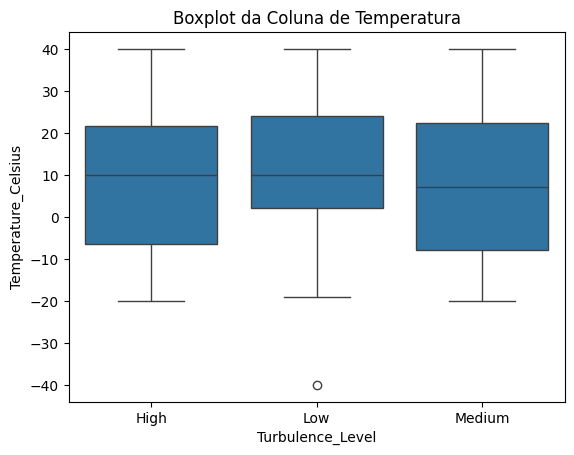

In [ ]:
#visualizando os outliers ou noises

sns.boxplot(x= "Turbulence_Level",y='Temperature_Celsius', data=df)
plt.title('Boxplot da Coluna de Temperatura')
plt.show()


Não há a percepção de outliers no bloxplot, mas como a temperatura -40 destuou do restante, faremos o código retiranda.

In [ ]:
print("Estatísticas antes da remoção de outliers:")
print(df.describe())

Estatísticas antes da remoção de outliers:
       Temperature_Celsius  Wind_Speed_knots
count           301.000000        301.000000
mean              9.300725         25.347826
std              16.857445         14.000787
min             -40.000000          0.000000
25%              -5.000000         15.000000
50%               9.300725         25.347826
75%              23.000000         36.000000
max              40.000000         50.000000


### Se houver, retire-o
Dica: Pesquisa sobre o funcionamento do boxplot para encontrar o noise

In [ ]:
def sem_outlier(df, coluna):
    df = df[(df[coluna] >= -35)]
    return df

df = sem_outlier(df, 'Wind_Speed_knots')
df = sem_outlier(df, 'Temperature_Celsius')

print(df)


           Date   Time Departure_Airport Arrival_Airport  Temperature_Celsius  \
0    2024-10-11  10:25       ATL Airport     SEA Airport            35.000000   
1    2024-01-20  18:38       IAH Airport     AUS Airport             3.000000   
2    2024-12-26  12:50       STL Airport     SEA Airport            20.000000   
3    2024-08-19  07:28       MCO Airport     LAS Airport            33.000000   
4    2024-12-07  07:10       LAX Airport     SEA Airport            28.000000   
..          ...    ...               ...             ...                  ...   
295  2024-02-21  23:18       ORD Airport     TPA Airport            11.000000   
296  2024-07-14  04:45       SAN Airport     MSP Airport           -11.000000   
297  2024-12-06  13:36       PHX Airport     DTW Airport             9.300725   
298  2024-09-12  17:41       MSP Airport     MCO Airport             6.000000   
299  2024-12-05  15:04       DEN Airport     BOS Airport            11.000000   

     Wind_Speed_knots Turbu

In [ ]:
print("\nEstatísticas depois da remoção de outliers:")
print(df.describe())


Estatísticas depois da remoção de outliers:
       Temperature_Celsius  Wind_Speed_knots
count           300.000000        300.000000
mean              9.465060         25.398986
std              16.642350         13.995970
min             -20.000000          0.000000
25%              -5.000000         15.000000
50%               9.300725         25.347826
75%              23.000000         36.000000
max              40.000000         50.000000


## Transformação de atributos
### Transforme formato da feature date para datetime

In [ ]:
df[ "Date"] = pd.to_datetime(df["Date"])


df["Date"].head()

0   2024-10-11
1   2024-01-20
2   2024-12-26
3   2024-08-19
4   2024-12-07
Name: Date, dtype: datetime64[ns]

### Aplique Normalização em [0,1] (segundo o método min-max) nas features

1.   List item
2.   List item

Wind_Speeds_knots e Temperature_Celsius.
Dica: Guarde os novos valores em  novas features, para manter a proveniência e rastreabilidade.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_normalizado= df.copy()

scaler = MinMaxScaler()

df_normalizado['Wind_Speed_knots_normalizado'] = scaler.fit_transform(df_normalizado[['Wind_Speed_knots']])
df_normalizado['Temperature_Celsius_normalizado'] = scaler.fit_transform(df_normalizado[['Temperature_Celsius']])

print(df_normalizado.head())


        Date   Time Departure_Airport Arrival_Airport  Temperature_Celsius  \
0 2024-10-11  10:25       ATL Airport     SEA Airport                 35.0   
1 2024-01-20  18:38       IAH Airport     AUS Airport                  3.0   
2 2024-12-26  12:50       STL Airport     SEA Airport                 20.0   
3 2024-08-19  07:28       MCO Airport     LAS Airport                 33.0   
4 2024-12-07  07:10       LAX Airport     SEA Airport                 28.0   

   Wind_Speed_knots Turbulence_Level Visibility_km  \
0              45.0             High            19   
1              25.0              Low             6   
2              48.0           Medium             6   
3              48.0             High            18   
4              34.0              Low            20   

   Wind_Speed_knots_normalizado  Temperature_Celsius_normalizado  
0                          0.90                         0.916667  
1                          0.50                         0.383333  
2    

### Aplique Discretização na temperatura desse dataset

Implemente a discretização da temperatura. Defina os intervalos e os rótulos para as categorias de discretização conforme achar apropriado.



In [ ]:
import pandas as pd

df_normalizado['Wind_Speed_knots_normalizado'] = scaler.fit_transform(df_normalizado[['Wind_Speed_knots']])
df_normalizado['Temperature_Celsius_normalizado'] = scaler.fit_transform(df_normalizado[['Temperature_Celsius']])
bins = [-float('inf'), 0, 15, 22, 33, float('inf')]  # Exemplo de intervalos em graus Celsius
labels = ['Muito Frio', 'Frio', 'Moderado', 'Quente', 'Muito Quente']
df_normalizado['categoria_temperatura_celsius'] = pd.cut(df_normalizado['Temperature_Celsius'], bins=bins, labels=labels, right=False)

print(df_normalizado)

          Date   Time Departure_Airport Arrival_Airport  Temperature_Celsius  \
0   2024-10-11  10:25       ATL Airport     SEA Airport            35.000000   
1   2024-01-20  18:38       IAH Airport     AUS Airport             3.000000   
2   2024-12-26  12:50       STL Airport     SEA Airport            20.000000   
3   2024-08-19  07:28       MCO Airport     LAS Airport            33.000000   
4   2024-12-07  07:10       LAX Airport     SEA Airport            28.000000   
..         ...    ...               ...             ...                  ...   
295 2024-02-21  23:18       ORD Airport     TPA Airport            11.000000   
296 2024-07-14  04:45       SAN Airport     MSP Airport           -11.000000   
297 2024-12-06  13:36       PHX Airport     DTW Airport             9.300725   
298 2024-09-12  17:41       MSP Airport     MCO Airport             6.000000   
299 2024-12-05  15:04       DEN Airport     BOS Airport            11.000000   

     Wind_Speed_knots Turbulence_Level 

## Visualização dos Dados
Construa um gráfico para visualizar informações da base integrada. Por exemplo, você pode plotar a distribuição da temperatura discretizada por nível de turbulência ou um gráfico que mostre a variação da velocidade do vento ao longo de um mês


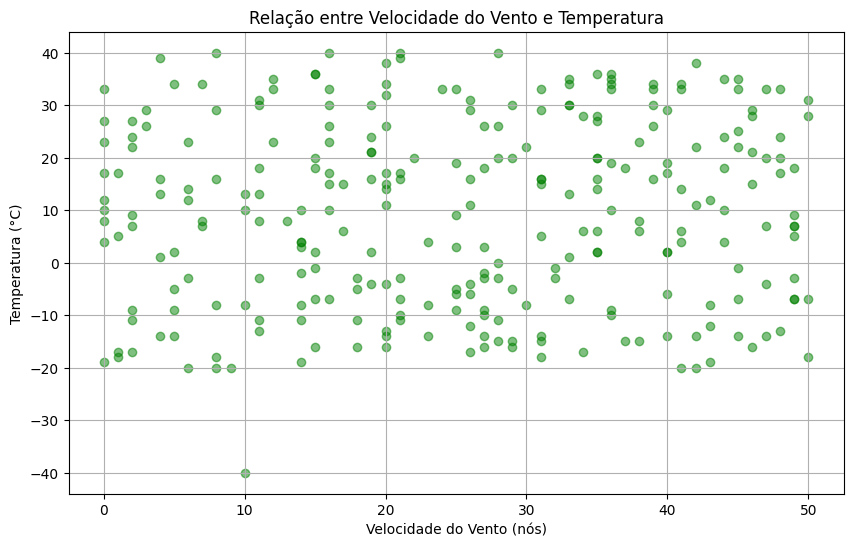

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
dados = pd.read_csv('flight_data_v1.csv',sep = ',')

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados['Wind_Speed_knots'], dados['Temperature_Celsius'], color='green', alpha=0.5)
plt.title('Relação entre Velocidade do Vento e Temperatura')
plt.xlabel('Velocidade do Vento (nós)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

## Gere o PDF

Para entregar o exercício, você pode simplesmente selecionar a opção de "Imprimir" no menu "Arquivo" (e selecionar para imprimir em PDF), ou tentar usar pacotes de conversão para PDF. Seguem abaixo alguns comandos neste sentido, mas que infelizmente não funcionam em todos os sistemas operacionais (a princípio, funcionam no Windows)


In [ ]:
import nbconvert

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
# No comando abaixo, substitua o último parâmetro pelo caminho+nome do seu notebook

!jupyter nbconvert --to pdf /content/Notebook-PreProcessamento.ipynb